# K Means Clustering

Importing the required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

Calculating distance between two datapoints

In [2]:
# Function to return the distance between two datapoints
def dist(a, b):
	s = 0
	for i in range(len(a)):
		s += abs(a[i] - b[i])
	return s

Calculating Mean

In [3]:
# Function to return the mean of set of datapoints
def mean(a):
	m = []
	for i in range(len(a[0])):
		s = 0
		for j in range(len(a)):
			s += a[j][i]
		m.append(s / len(a))
	return m

One Hot Encoding to make the dataset ready to be fed to the K Means Clustering algorithm

In [4]:
# Function to perform One Hot Encoding that is binarization of each column
# This function makes the dataset ready to be fed to the KMeans Clustering algorithm
def OneHotEncoding(X):
	global onehotX
	onehotX = []
	for i in range(len(X)):
		tmp1 = [0] * 6
		for j in range(6): 
			if X[i][0].lower() == season[j].lower():
				tmp1[j] = 1
				break
		tmp2 = [0] * 6
		for j in range(6): 
			if X[i][1].lower() == soil[j].lower():
				tmp2[j] = 1
				break
		tmp3 = [0] * 5
		for j in range(5): 
			if X[i][2].lower() == rainfall[j].lower():
				tmp3[j] = 1
				break

		tmp = []
		for j in tmp1: tmp.append(j)
		for j in tmp2: tmp.append(j)
		for j in tmp3: tmp.append(j)
		onehotX.append(tuple(tmp))

K Means Clustering Algorithm

In [5]:
# Function that implements K_Means Clustering Algorithm
# Returns a dictionary where key is the datapoint and value is the cluster it belongs to
def K_Means(onehotX):
	global m
	rndm =  [8, 3, 73, 30, 51, 71, 17, 58, 19, 74, 21, 46]
	for i in rndm:
		m.append(onehotX[i])
	count = 0
	for I in range(100):
		count -= -1
		c = {}
		for i in range(len(onehotX)):
			ind = 0
			mn = 20
			for j in range(12):
				if dist(onehotX[i], m[j]) < mn:
					mn = dist(onehotX[i], m[j])
					ind = j
			c[onehotX[i]] = ind
		m2 = []
		for i in range(12):
			ttt = []
			for j in c:
				if c[j] == i: ttt.append(j)
			m2.append(mean(ttt))
		if m2 == m: break
		m = m2
	return c

Reading the data and calling the required functions to perform K Means Clustering

In [6]:
filepath = os.path.join('..','data','7_Preprocess_Final.csv')
DF = pd.read_csv(filepath)

df = DF[['Season', 'Soil Type', 'Rainfall_Disc']]

DF = DF[['Season', 'Crop', 'Soil Type', 'Rainfall_Disc', 'Yield_Disc']]

X = df.iloc[:, : ].values

df = DF[['Crop', 'Yield_Disc']]
cr = df.iloc[:, : ].values

# cpp is a list of list where inner list contains crop and yield of each row
cpp = []
for i in cr: cpp.append(i.tolist())

# ans contains list which contains each element of cpp and the cluster it belongs to
ans = []

# crop is a list of all unique crops in the dataset
crop = DF['Crop'].unique()

# season is a list of all unique seasons in the dataset
season = DF['Season'].unique()

# soil is a list of all unique types of soil in the dataset
soil = DF['Soil Type'].unique()

# rainfall is a list of all unique types of rainfall in the dataset
rainfall = DF['Rainfall_Disc'].unique()

# onehotX is a list. It is basically One Hot Encoding where each column is binarized to apply KMeans Clustering algorithm
onehotX = []

OneHotEncoding(X)

onehotX2 = []
for i in onehotX: onehotX2.append(i)

onehotX = list(set(onehotX))

clscropyield = []

# m contains the final mean of each cluster
m = []

# c is a dictionary where the key is the datapoint and the value is the cluster it belongs to
c = K_Means(onehotX)


for i in range(len(onehotX2)):
	ans.append([cpp[i], c[onehotX2[i]]])

rain = ['Very_High', 'High', 'Medium', 'Low', 'Very_Low']

Taking input from the user and providing the crops that are most suitable to be grown based on the input conditions

In [12]:
# Taking user input and checking for invalid inputs
print("Please provide the conditions so that we can suggest suitable crops to grow")
print()	
print("Enter 1 to 6 corresponding to your choice of season:\n1 Kharif\n2 Summer\n3 Whole Year\n4 Rabi\n5 Winter\n6 Autumn")
ch1 = 0
ch2 = 0
ch3 = 0
tempo = input()
if len(tempo) > 1 or tempo == '':
	ch1 = 1
elif ord(tempo) < 49 or ord(tempo) > 54:
	ch1 = 1
if ch1 == 0: inp_season = season[int(tempo) - 1]

print("\nEnter 1 to 6 corresponding to your choice of soil type:\n1 Alluvial\n2 Black\n3 Red\n4 Mountain\n5 Laterite\n6 Arid")
tempo = input()
if len(tempo) > 1 or tempo == '':
	ch2 = 1
elif ord(tempo) < 49 or ord(tempo) > 54:
	ch2 = 1
if ch2 == 0: inp_soil = soil[int(tempo) - 1]

print("\nEnter 1 to 5 corresponding to your choice of rainfall:\n1 Very_High\n2 High\n3 Medium\n4 Low\n5 Very_Low")
tempo = input()
if len(tempo) > 1 or tempo == '':
	ch3 = 1
elif ord(tempo) < 49 or ord(tempo) > 53:
	ch3 = 1
if ch3 == 0: inp_rainfall = rain[int(tempo) - 1]
print()


if ch1 or ch2 or ch3:
	print("Invalid Input")
else:
	Y = [[inp_season, inp_soil, inp_rainfall]]

	OneHotEncoding(Y)


	# Calculating the cluster which the input points belong to
	mn = 20
	for i in range(12):
		if dist(onehotX[0], m[i]) < mn:
			mn = dist(onehotX[0], m[i])
			predicted_class = i


	# Each of the five lists below contains the crops with the particular yield as indicated in the name
	very_high_yield = []
	high_yield = []
	medium_yield = []
	low_yield = []
	very_low_yield = []

	for i in ans:
		if i[1] == predicted_class:	
			if i[0][1] == 'Very_High': very_high_yield.append(i[0][0])
			elif i[0][1] == 'High': high_yield.append(i[0][0])
			elif i[0][1] == 'Medium': medium_yield.append(i[0][0])
			elif i[0][1] == 'Low': low_yield.append(i[0][0])
			elif i[0][1] == 'Very_Low': very_low_yield.append(i[0][0])

	very_high_yield = set(very_high_yield)

	high_yield = set(high_yield)

	medium_yield = set(medium_yield)

	very_low_yield = set(very_low_yield)

	low_yield = set(low_yield)



	# The crops with very high yield are only those which never give very low yield or low yield and so.
	# This step more or less removes the possibility that high yield of the crop was because of artificial water supply
	very_high_yield -= very_low_yield
	very_high_yield -= low_yield
	very_high_yield -= high_yield
	very_high_yield -= medium_yield

	high_yield -= very_low_yield
	high_yield -= medium_yield


	# Output
	print("The following crop(s) give(s) a Very High Yield:")
	print(very_high_yield)
	print()

	if len(high_yield) > 0:
		print("The following crop(s) give(s) High Yield as well:")
		print(high_yield)
		print()

Please provide the conditions so that we can suggest suitable crops to grow

Enter 1 to 6 corresponding to your choice of season:
1 Kharif
2 Summer
3 Whole Year
4 Rabi
5 Winter
6 Autumn
1

Enter 1 to 6 corresponding to your choice of soil type:
1 Alluvial
2 Black
3 Red
4 Mountain
5 Laterite
6 Arid
1

Enter 1 to 5 corresponding to your choice of rainfall:
1 Very_High
2 High
3 Medium
4 Low
5 Very_Low
3

The following crop(s) give(s) a Very High Yield:
{'Orange', 'Ginger', 'Papaya', 'Pineapple'}

The following crop(s) give(s) High Yield as well:
{'Tapioca'}



## Analysing the clusters

In [8]:
# clusters, dictionary key= cluster number, value = list of crops of that cluster
clusters = dict()
total = 0
for _, (crop, cluster) in enumerate(ans):
    if cluster not in clusters.keys():
        clusters[cluster] = []
    
    clusters[cluster].append(crop[0])

for i in clusters.keys():
    total += len(clusters[i])

# distribution of clusters
cluster_sizes = dict()
for i in clusters.keys():
    if i not in cluster_sizes.keys():
        cluster_sizes[i] = 0
    
    cluster_sizes[i] = len(clusters[i])/total

# converting to list for plotting
labels = list(cluster_sizes.keys())
labels = ["Cluster"+str(i+1) for i in labels]
distribution = []
for i in labels:
    i = int(i[7:])-1
    distribution.append(cluster_sizes[i])



## Cluster Crop Distribution

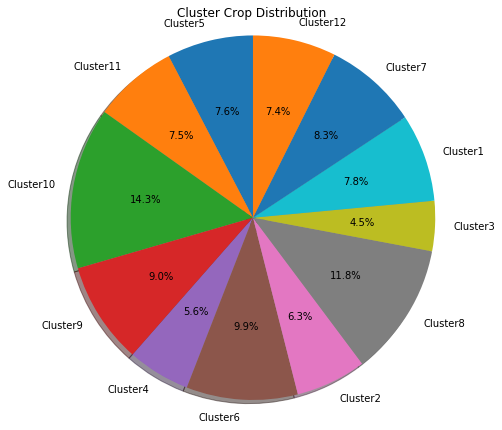

In [9]:
crop_distribution = []
unique_crops = len(set(DF.Crop))
for i in labels:
    i = int(i[7:])-1
    crop_distribution.append(len(set(clusters[i]))/unique_crops)
    
fig2, ax2 = plt.subplots(figsize=(6, 6))
ax2.pie(crop_distribution, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax2.axis('equal')
plt.title("Cluster Crop Distribution")
plt.tight_layout()
plt.savefig("../plots/KMeans/Cluster-Crop-Distribution.png")
plt.show()


## Crop Specificity

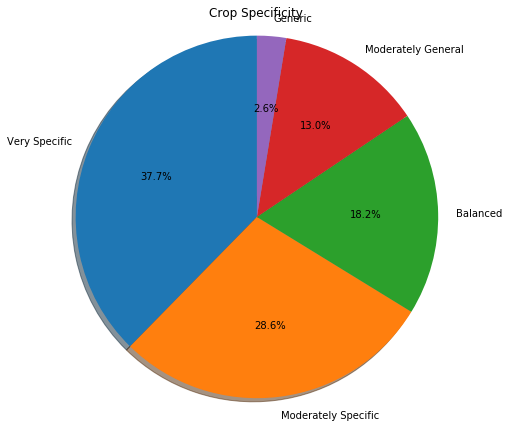

In [10]:
mod_ans = []
for i, ((crop, yieldv), _) in enumerate(ans):
    if yieldv == "Very_High":
        mod_ans.append(ans[i])

crop_yield_distribution=[]
yield_cluster = dict()
for i, ((crop, _), cluster) in enumerate(mod_ans):
    if crop not in yield_cluster.keys():
        yield_cluster[crop] = []
    
    yield_cluster[crop].append(cluster)

yield_crop_labels = list(yield_cluster.keys())
for i in yield_crop_labels:
    crop_yield_distribution.append(len(set(yield_cluster[i])))

specificity = []
max_thresh = 3
min_thresh = 0
for i in range(5):
    tmp = []
    for j, crop in enumerate(crop_yield_distribution):
        if crop >= min_thresh and crop < max_thresh:
            tmp.append(j)
    min_thresh = max_thresh
    max_thresh += 3
    specificity.append(tmp)

speficity_labels = ['Very Specific', 'Moderately Specific', 'Balanced', 'Moderately General', 'Generic']
specificity = [(len(i)/12) for i in specificity]


fig23, ax3 = plt.subplots(figsize=(6, 6))
ax3.pie(specificity, labels=speficity_labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax3.axis('equal')
plt.title("Crop Specificity")
plt.tight_layout()
plt.savefig("../plots/KMeans/Crop-Specificity.png")
plt.show()